#**ANÁLISE EXPLORATÓRIA e PRÉ-PROCESSAMENTO DE DADOS PARA REDES NEURAIS RECORRENTES (RNNs)**

**OBJETIVO: Realizar análise exploratória do dataset com o intuito de prepará-lo e ajustar suas informações para processamento posterior de deep learning com arquitetura de rede neural recorrente Long Short Term Memory (LSTM).**

In [ ]:
import math
import pandas as pd
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Carregando datasets:
dadosEnergia = pd.read_csv('/content/drive/My Drive/energy_dataset.csv')
dadosClima = pd.read_csv('/content/drive/My Drive/weather_features.csv')

In [ ]:
dadosEnergia.head(3)

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,920.0,1009.0,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,1164.0,973.0,1371.0,0.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48


In [ ]:
dadosClima.tail(3)

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
178393,2018-12-31 21:00:00+01:00,Seville,285.15,285.15,285.15,1028,58,4,50,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178394,2018-12-31 22:00:00+01:00,Seville,284.15,284.15,284.15,1029,57,4,60,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178395,2018-12-31 23:00:00+01:00,Seville,283.97,282.15,285.15,1029,70,3,50,0.0,0.0,0.0,0,800,clear,sky is clear,01n


**Pré-processamento do primeiro conjunto de dados(energia)**

In [ ]:
#Verificando tipos de dados do dataset:
dadosEnergia.dtypes

time                                            object
generation biomass                             float64
generation fossil brown coal/lignite           float64
generation fossil coal-derived gas             float64
generation fossil gas                          float64
generation fossil hard coal                    float64
generation fossil oil                          float64
generation fossil oil shale                    float64
generation fossil peat                         float64
generation geothermal                          float64
generation hydro pumped storage aggregated     float64
generation hydro pumped storage consumption    float64
generation hydro run-of-river and poundage     float64
generation hydro water reservoir               float64
generation marine                              float64
generation nuclear                             float64
generation other                               float64
generation other renewable                     float64
generation

In [ ]:
#Uma vez que os dados de data (time) estão em formato 'Object', ajustá-los para formato adequado (date_time):
dadosEnergia['time'] = pd.to_datetime(dadosEnergia['time'], utc=True)

In [ ]:
#Verificando dados nulos:
dadosEnergia.isnull().sum()

time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                              

In [ ]:
#Verificando dados nulos em termos percentuais:
dadosNulos = (dadosEnergia.isnull().sum() / len(dadosEnergia['time'])) *100
dadosNulos

time                                             0.000000
generation biomass                               0.054187
generation fossil brown coal/lignite             0.051335
generation fossil coal-derived gas               0.051335
generation fossil gas                            0.051335
generation fossil hard coal                      0.051335
generation fossil oil                            0.054187
generation fossil oil shale                      0.051335
generation fossil peat                           0.051335
generation geothermal                            0.051335
generation hydro pumped storage aggregated     100.000000
generation hydro pumped storage consumption      0.054187
generation hydro run-of-river and poundage       0.054187
generation hydro water reservoir                 0.051335
generation marine                                0.054187
generation nuclear                               0.048483
generation other                                 0.051335
generation oth

In [ ]:
#Verificando quantidade de zeros nas variáveis do dataset em termos percentuais:
zerosQtde = (dadosEnergia[dadosEnergia==0].count() / len(dadosEnergia['time'])) *100
zerosQtde

time                                            0.000000
generation biomass                              0.011408
generation fossil brown coal/lignite           29.993726
generation fossil coal-derived gas             99.948665
generation fossil gas                           0.002852
generation fossil hard coal                     0.008556
generation fossil oil                           0.008556
generation fossil oil shale                    99.948665
generation fossil peat                         99.948665
generation geothermal                          99.948665
generation hydro pumped storage aggregated      0.000000
generation hydro pumped storage consumption    35.954255
generation hydro run-of-river and poundage      0.008556
generation hydro water reservoir                0.008556
generation marine                              99.945813
generation nuclear                              0.008556
generation other                                0.011408
generation other renewable     

**AÇÕES A SEREM TOMADAS ATÉ O MOMENTO PARA LIMPEZA DO DATASET:**
1. Irei criar uma nova variável para salvar a previsão de preços do dia seguinte contida no próprio dataset e remover do dataset atual para a nossa previsão. Pode servir para comparação posterior após resultados da aplicação de modelo ML ou rede neural.
2. Optei por não substituir elementos de features com quantidade expressiva de dados faltantes, excluindo as features com 100% de dados nulos e com muitos valores iguais a zero.
3. Depois da exclusão das features com valores mais discrepantes, realizarei uma interpolação dos dados missing (espécie de substituição por um valor médio, só que mais adequada em casos de dados temporais prevenindo uma dispersão no gráfico). Em datasets com dados não ligados de maneira temporal, podemos fazer visualizar estes valores por meio de boxplots ou histogramas para tomada de decisão em relação aos outliers. Em datasets com dados temporais, podemos usar uma 'interpolação linear' que liga dois pontos por meio de uma reta.

In [ ]:
#1. Criando nova variável da feature de previsão já contida no dataset:
previsaoEnergia = dadosEnergia['price day ahead']
previsaoEnergia.head(3)

0    50.10
1    48.10
2    47.33
Name: price day ahead, dtype: float64

In [ ]:
#2. Excluindo features desnecessárias:
dadosEnergia = dadosEnergia.drop(['generation fossil coal-derived gas', 'generation fossil oil shale', 
                                 'generation fossil peat', 'generation geothermal', 'generation marine',
                                 'generation wind offshore', 'generation hydro pumped storage aggregated',
                                 'forecast wind offshore eday ahead', 'price day ahead'], axis=1)

In [ ]:
#Checando exclusão acima:
dadosEnergia.head(2)

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price actual
0,2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,65.41
1,2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,64.92


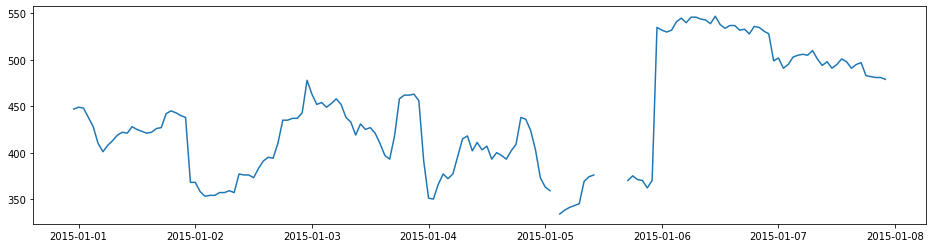

In [ ]:
#3. Visualizando dados faltantes no gráfico:
x = dadosEnergia[:24*7]['time']  #24*7 = converte em time frame semanal
y = dadosEnergia[:24*7]['generation biomass']  #informa a variável a ser visualizado com time frame semanal
plt.figure(figsize=(16,4))
plt.plot(x,y)

In [ ]:
,#Substituir dados missing ainda existentes no dataset através de interpolação linear:
dadosEnergia.interpolate(method='ffill', limit_direction='forward', inplace=True)

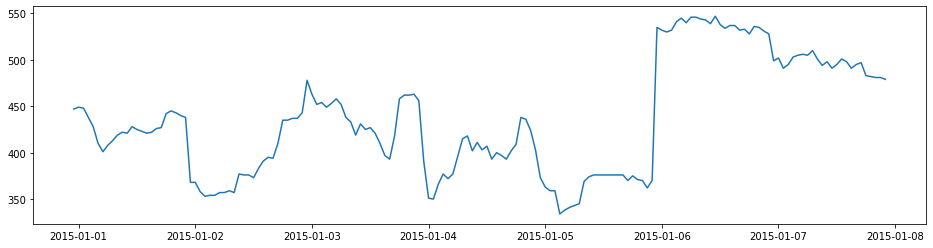

In [ ]:
#Visualizando gráfico após a interpolação:
x = dadosEnergia[:24*7]['time']  #24*7 = converte em time frame semanal
y = dadosEnergia[:24*7]['generation biomass']  #informa a variável a ser visualizado com time frame semanal
plt.figure(figsize=(16,4))
plt.plot(x,y)

**Pré-processamento do segundo conjunto de dados(clima)**

In [ ]:
dadosClima.head(3)

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [ ]:
#Visualizando dados clima:
dadosClima.dtypes

dt_iso                  object
city_name               object
temp                   float64
temp_min               float64
temp_max               float64
pressure                 int64
humidity                 int64
wind_speed               int64
wind_deg                 int64
rain_1h                float64
rain_3h                float64
snow_3h                float64
clouds_all               int64
weather_id               int64
weather_main            object
weather_description     object
weather_icon            object
dtype: object

In [ ]:
#Ajustando dados de data ("dt_iso") para formato adequado (date_time) e criando nova variável para armazenar este novo dado excluindo a antiga:
dadosClima['time'] = pd.to_datetime(dadosClima['dt_iso'])
dadosClima = dadosClima.drop(['dt_iso'], axis=1)

In [ ]:
#Convertendo dados int para float:
colunasInt = dadosClima.select_dtypes(include=[np.int64]).columns #Seleciona as colunas do tipo int no dataset
for coluna in colunasInt:
  dadosClima[coluna].values.astype(np.float64)  #Converte cada coluna do tipo int para o formato float

In [ ]:
dadosClima.dtypes

city_name               object
temp                   float64
temp_min               float64
temp_max               float64
pressure                 int64
humidity                 int64
wind_speed               int64
wind_deg                 int64
rain_1h                float64
rain_3h                float64
snow_3h                float64
clouds_all               int64
weather_id               int64
weather_main            object
weather_description     object
weather_icon            object
time                    object
dtype: object

In [ ]:
#Verificando variáveis do tipo object com 'unique'(lista os valores únicos de cada coluna):
weather_description = dadosClima['weather_description'].unique()
weather_description

array(['sky is clear', 'few clouds', 'scattered clouds', 'broken clouds',
       'overcast clouds', 'light rain', 'moderate rain',
       'heavy intensity rain', 'mist', 'heavy intensity shower rain',
       'shower rain', 'very heavy rain', 'thunderstorm with heavy rain',
       'thunderstorm with light rain', 'thunderstorm with rain',
       'proximity thunderstorm', 'thunderstorm',
       'light intensity shower rain', 'light intensity drizzle', 'fog',
       'drizzle', 'smoke', 'heavy intensity drizzle', 'haze',
       'proximity shower rain', 'light intensity drizzle rain',
       'light snow', 'rain and snow', 'light rain and snow', 'snow',
       'light thunderstorm', 'heavy snow', 'sleet', 'rain and drizzle',
       'shower sleet', 'light shower sleet', 'light shower snow',
       'proximity moderate rain', 'ragged shower rain',
       'sand dust whirls', 'proximity drizzle', 'dust', 'squalls'],
      dtype=object)

In [ ]:
weather_main = dadosClima['weather_main'].unique()
weather_main

array(['clear', 'clouds', 'rain', 'mist', 'thunderstorm', 'drizzle',
       'fog', 'smoke', 'haze', 'snow', 'dust', 'squall'], dtype=object)

In [ ]:
weather_icon = dadosClima['weather_icon'].unique()
weather_icon

array(['01n', '01d', '01', '02n', '02d', '02', '03', '04n', '04', '10n',
       '03n', '10', '04d', '03d', '10d', '50d', '09n', '11d', '11n',
       '09d', '50n', '13d', '13n', '13'], dtype=object)

In [ ]:
#Vendo a qtde de valores das maiores variáveis do tipo object:
print(len(weather_description))
print(len(weather_icon))
print(len(weather_main))

43
24
12


In [ ]:
#Verificando dados faltantes:
dadosClima.isnull().sum()

city_name              0
temp                   0
temp_min               0
temp_max               0
pressure               0
humidity               0
wind_speed             0
wind_deg               0
rain_1h                0
rain_3h                0
snow_3h                0
clouds_all             0
weather_id             0
weather_main           0
weather_description    0
weather_icon           0
time                   0
dtype: int64

Até o momento vimos que algums variáveis contendo muitos dados do tipo object são desnecessárias pois fornecem o mesmo tipo de informação. Logo, vamos manter apenas a coluna 'weather_description' que contém mais dados e nos fornece informações mais completas.

In [ ]:
dadosClima = dadosClima.drop(['weather_icon', 'weather_main'], axis=1)

In [ ]:
# Removendo linhas duplicadas
dadosClima = dadosClima.drop_duplicates(subset=['time', 'city_name'], keep='first')
dadosClima = dadosClima.set_index('time') # colocando time como índice do dataset

In [ ]:
# Verificando quantas amostras há em cada cidade:
clima_agrupado = dadosClima.groupby('city_name')
nomes_cidades = dadosClima['city_name'].unique()
for nome in nomes_cidades:
    print(nome, clima_agrupado.get_group(nome).shape[0])
print('Dataset Energia:', dadosEnergia.shape[0])

Valencia 35064
Madrid 35064
Bilbao 35064
 Barcelona 35064
Seville 35064
Dataset Energia: 35064


In [ ]:
# Aplicando label encoding na variável 'weather_description' para aplicação de modelos:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dadosClima['weather_description'] = le.fit_transform(dadosClima['weather_description'])

In [ ]:
dadosEnergia = dadosEnergia.set_index('time')
dEnergia = dadosEnergia 

**Unindo os dois dataframes**

In [ ]:
#Unindo os dois datasets com método 'join': une dfs diferentes preservando valores distintos dos índices de cada um com 'outer':
dFinal = dEnergia.join(dadosClima, how='outer')
dFinal.head(3)

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price actual,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_description
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,65.41,Valencia,270.475000,270.475000,270.475000,1001,77,1,62,0.0,0.0,0.0,0,800,31
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,65.41,Madrid,267.325000,267.325000,267.325000,971,63,1,309,0.0,0.0,0.0,0,800,31
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,65.41,Bilbao,269.657312,269.657312,269.657312,1036,97,0,226,0.0,0.0,0.0,0,800,31


In [ ]:
#Checando se valores faltantes foram inseridos no novo dataset:
dFinal.isnull().sum()

generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind onshore                        0
forecast solar day ahead                       0
forecast wind onshore day ahead                0
total load forecast                            0
total load actual                              0
price actual                                   0
city_name                                      0
temp                

In [ ]:
dFinal.shape

(175320, 33)

**FIM**